# Notebook Chuẩn GPU 
Tommy NgX

## Testing GPU & Setup
---

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
!nvidia-smi

Your runtime has 13.6 gigabytes of available RAM

Mon Jun 28 02:51:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                      

In [ ]:
import os#
from google.colab import files
from google.colab import output
!rm -rf /content/sample_data
if os.path.exists('/content/tommy')== False:  
  os.mkdir('/content/tommy')
!pip install ipython-autotime --quiet
!apt install wget --quiet
!apt install ffmpeg --quiet
!pip install detecto --quiet
output.clear()
import datetime
now = "Done process at : " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(now)
def ketthuc():
  output.clear()
  print(now)
%load_ext autotime

Done process at : 2021-06-22 16:20:55
time: 141 µs (started: 2021-06-22 16:20:55 +00:00)


In [ ]:
# Library
from PIL import Image
import shutil
import requests
from google.colab import files
from IPython.display import Image, display
import numpy as np
import pandas as pd

from detecto.core import Model, Dataset, DataLoader
from detecto.utils import xml_to_csv, read_image
from detecto.visualize import detect_video
from detecto import visualize
import matplotlib.pyplot as plt
import os
import json
import pandas as pd
import cv2
import matplotlib.image as mpimg

time: 4.69 s (started: 2021-06-22 16:20:55 +00:00)


In [ ]:
%cd /content/tommy/
if os.path.exists('/content/hand-fracture-mini.zip')== False:  
  !kaggle datasets download -d tommyngx/hand-fracture-mini
  !unzip /content/tommy/hand-fracture-mini.zip -d /content/tommy
  !rm -rf /content/tommy/hand-fracture-mini.zip

ketthuc()

Done process at : 2021-06-22 16:20:55
time: 1.67 s (started: 2021-06-22 16:20:59 +00:00)


---
# Let's Go

(-0.5, 441.5, 441.5, -0.5)

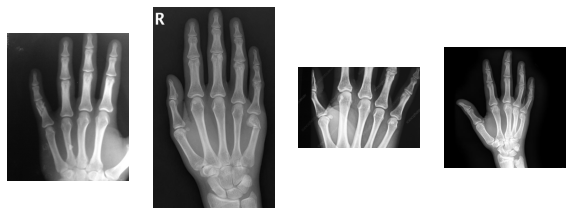

time: 292 ms (started: 2021-06-22 16:23:02 +00:00)


In [ ]:
train_dir = '/content/tommy/train/'
fig = plt.figure(figsize = (10, 10))
# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(1, 4, 1)
plt.imshow(mpimg.imread(train_dir + '20.jpg'))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(mpimg.imread(train_dir + '12.jpg'))
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(mpimg.imread(train_dir + '10.jpg'))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(mpimg.imread(train_dir + '1.jpg'))
plt.axis('off')

In [ ]:
xml_to_csv('/content/tommy/train/', 'train.csv')
#xml_to_csv('/content/tommy/test/', 'test.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,10.jpg,800,531,fracture,291,225,352,309,0
1,158.jpg,872,1024,fracture,578,202,675,349,1
2,158.jpg,872,1024,fracture,570,67,609,132,1
3,37.jpg,1500,2000,fracture,715,1114,921,1405,2
4,87.jpg,555,865,fracture,141,402,170,421,3
...,...,...,...,...,...,...,...,...,...
288,69.jpg,327,442,fracture,84,217,117,274,233
289,213.jpg,946,1500,fracture,285,781,378,899,234
290,213.jpg,946,1500,fracture,376,746,469,869,234
291,234.jpg,525,812,fracture,400,384,446,431,235


time: 39.3 ms (started: 2021-06-22 16:38:24 +00:00)


In [ ]:
df_train = pd.read_csv('/content/tommy/train.csv')
df_train

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,10.jpg,800,531,fracture,291,225,352,309,0
1,158.jpg,872,1024,fracture,578,202,675,349,1
2,158.jpg,872,1024,fracture,570,67,609,132,1
3,37.jpg,1500,2000,fracture,715,1114,921,1405,2
4,87.jpg,555,865,fracture,141,402,170,421,3
...,...,...,...,...,...,...,...,...,...
288,69.jpg,327,442,fracture,84,217,117,274,233
289,213.jpg,946,1500,fracture,285,781,378,899,234
290,213.jpg,946,1500,fracture,376,746,469,869,234
291,234.jpg,525,812,fracture,400,384,446,431,235


time: 28.9 ms (started: 2021-06-22 16:29:27 +00:00)


In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('/content/tommy/train/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
    # converting to jpg
    rgb_im = im.convert("RGB")
    # exporting the image
    rgb_im.save(filename)
    print("The size of the image after conversion : ",filename )
ketthuc()
for filename in glob.glob('/content/tommy/test/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
    # converting to jpg
    rgb_im = im.convert("RGB")
    # exporting the image
    rgb_im.save(filename)
    print("The size of the image after conversion : ",filename )
ketthuc()

Done process at : 2021-06-22 16:20:55
time: 5.63 s (started: 2021-06-22 16:56:35 +00:00)


In [ ]:
dataset = Dataset('train.csv', '/content/tommy/train/')
loader = DataLoader(dataset, batch_size=2, shuffle=False)
i=1
for images, targets in loader:
  print(i)
  print(images[0].shape)
  print(targets[0])
  i=i+1

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.23659356795251368
Epoch 2 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.22411430068314075
Epoch 3 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.19601952601224185
Epoch 4 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.17748425509780646
Epoch 5 of 10
Begin iterating over training dataset


  2%|▎         | 1/40 [00:00<00:07,  5.29it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.17249269485473634
Epoch 6 of 10
Begin iterating over training dataset


  2%|▎         | 1/40 [00:00<00:07,  5.20it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.1672154488041997
Epoch 7 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.165876149199903
Epoch 8 of 10
Begin iterating over training dataset


  2%|▎         | 1/40 [00:00<00:07,  5.22it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.1655581111088395
Epoch 9 of 10
Begin iterating over training dataset


  2%|▎         | 1/40 [00:00<00:07,  5.15it/s]

Begin iterating over validation dataset


  0%|          | 0/119 [00:00<?, ?it/s]

Loss: 0.16290533747524022
Epoch 10 of 10
Begin iterating over training dataset


  0%|          | 0/40 [00:00<?, ?it/s]

Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.80it/s]


Loss: 0.16329496800899507


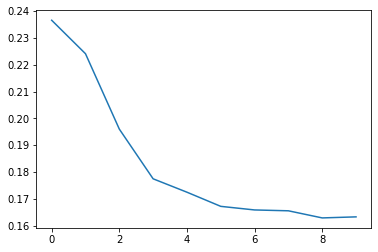

time: 12min 23s (started: 2021-06-22 16:56:47 +00:00)


In [ ]:
dataset = Dataset('train.csv', '/content/tommy/train/')
val_dataset = Dataset('test.csv', '/content/tommy/test/')  
# Validation dataset for training
# Create your own DataLoader with custom options
loader = DataLoader(dataset, batch_size=2, shuffle=True)
model = Model(['fracture'])
losses = model.fit(loader, val_dataset, epochs=10, learning_rate=0.001, verbose=True)
plt.plot(losses)  # Visualize loss throughout training
plt.show()

In [ ]:
image = read_image('/content/tommy/test/3.jpg')  
# Helper function to read in images
labels, boxes, scores = model.predict(image)

time: 182 ms (started: 2021-06-22 17:09:16 +00:00)


In [ ]:
def view_predictions(labels, boxes, scores, conf, path):
    lab = []
    box = []
    scr = []
    img = cv2.imread(path)
    for i,j in enumerate(scores):
        if j > conf:
            lab.append(labels[i])
            box.append(boxes[i])
            scr.append(scores[i])
    for k,l in enumerate(box):       
        x = box[k][0]
        y = box[k][1]
        x2 = box[k][2]
        y2 = box[k][3]    
        cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 4)
        cv2.putText(img, str(scr[k]), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
    return img

time: 9.07 ms (started: 2021-06-22 17:09:19 +00:00)


In [ ]:
# Comparing with GT
path = '/content/tommy/test/14.jpg'
image = read_image(path)  # Helper function to read in images
labels, boxes, scores = model.predict(image) 

time: 178 ms (started: 2021-06-22 17:09:22 +00:00)


In [ ]:
test_df = pd.read_csv('/content/tommy/test.csv')
cur_df = test_df[test_df['filename'] == path.split('/')[-1]]
img_gt = cv2.imread(path)
x = cur_df['xmin']
y = cur_df['ymin']
x2 = cur_df['xmax']
y2= cur_df['ymax']
ans = cv2.rectangle(img_gt, (x, y), (x2, y2), (255, 0, 0), 4)

time: 24.7 ms (started: 2021-06-22 17:09:37 +00:00)


Text(0.5, 1.0, 'prediction')

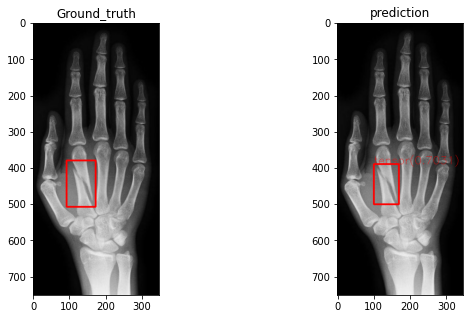

time: 342 ms (started: 2021-06-22 17:09:42 +00:00)


In [ ]:
img = view_predictions(labels, boxes, scores, 0.45, path)

figure = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gt)
plt.title("Ground_truth")

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title("prediction")

Done process at : 2021-06-22 16:20:55


Text(0.5, 1.0, 'prediction')

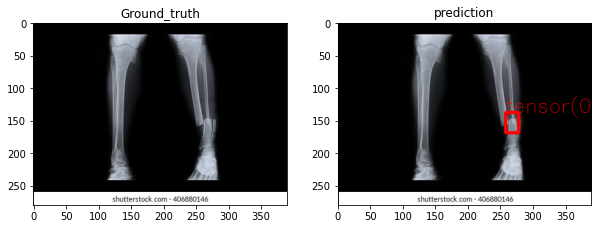

time: 1.18 s (started: 2021-06-22 17:09:47 +00:00)


In [ ]:
# With random x-rays
!wget -O /content/tommy/s2.jpg https://image.shutterstock.com/image-photo/closed-fracture-left-leg-xray-260nw-406880146.jpg
path = '/content/tommy/s2.jpg'
ketthuc()
image = read_image(path)  # Helper function to read in images
labels, boxes, scores = model.predict(image)
rimg = view_predictions(labels, boxes, scores, 0.2, path)
rimg_gt = cv2.imread(path)

figure = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rimg_gt)
plt.title("Ground_truth")

plt.subplot(1, 2, 2)
plt.imshow(rimg)
plt.title("prediction")

### SAVE MODEL

In [ ]:
model.save("hand_fracture.h5")

time: 354 ms (started: 2021-06-22 17:15:11 +00:00)


---
# End Note

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

time: 215 ms
